In [2]:
import os
import logging
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
tf.get_logger().setLevel(logging.ERROR)       #Just to mute warning messages.

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
spec = cv2.imread("specs/class0/1.png", 0)
#plt.imshow(spec, cmap="gray")
spec.max()

242

In [4]:
images = []
labels = []

for i in range(10):
    path = "specs/class" + str(i)
    num = len(os.listdir(path))
    for j in range(num):
        img_path = path + "/" + str(j) + ".png"
        img = cv2.imread(img_path, 0)
        img = img / 255
        images.append(img)
        labels.append(i)

images = np.array(images)
labels = np.array(labels)

print(f"len(images) = {len(images)}")
print(f"len(labels) = {len(labels)}")

len(images) = 8732
len(labels) = 8732


In [5]:
images.shape

(8732, 100, 100)

In [6]:
from sklearn.model_selection import train_test_split

train_size = 0.75
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=train_size, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_test, x_dev, y_test, y_dev = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

x_train = x_train.reshape(int(len(images)*train_size), 100, 100, 1)
x_test = x_test.reshape(int(len(images)*(1-train_size)/2), 100, 100, 1)
x_dev = x_dev.reshape(int(len(images)*(1-train_size)/2)+1, 100, 100, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_dev.shape, y_dev.shape)
#plt.imshow(x_train[0], cmap="gray")

(6549, 100, 100) (6549,) (2183, 100, 100) (2183,)
(6549, 100, 100, 1) (6549,) (1091, 100, 100, 1) (1091,) (1092, 100, 100, 1) (1092,)


In [7]:
from keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 10)
print(y_cat_train.shape, y_cat_train[0])

y_cat_test = to_categorical(y_test, 10)
y_cat_dev = to_categorical(y_dev, 10)

(6549, 10) [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.losses import categorical_crossentropy
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Let's compare 4 different architectures, from simple to more complex.

img_shape = (100, 100, 1)
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=img_shape, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer="adam", loss=categorical_crossentropy, metrics=['accuracy'])

model2 = Sequential([
    Conv2D(filters=64, kernel_size=(4, 4), input_shape=img_shape, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer="adam", loss=categorical_crossentropy, metrics=['accuracy'])

model3 = Sequential([
    Conv2D(filters=64, kernel_size=(4, 4), input_shape=img_shape, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(optimizer="adam", loss=categorical_crossentropy, metrics=['accuracy'])

model4 = Sequential([
    Conv2D(filters=64, kernel_size=(4, 4), input_shape=img_shape, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(4, 4), input_shape=img_shape, activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    #QUESTIN: is adding the following line better?
    #Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model4.compile(optimizer="adam", loss=categorical_crossentropy, metrics=['accuracy'])


In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 97, 97, 64)        1088      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        1088      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        65600     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 30976)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [13]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        1088      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 64)        65600     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 19, 19, 64)        65600     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 9, 9, 64)         

In [14]:
models = [model1, model2, model3, model4]
histories = []

In [15]:
for i, model in enumerate(models):
    print(f"\nTRAINING MODEL {i+1}:")
    tmp = model.fit(x_train, y_cat_train, epochs=15, verbose=1, validation_data=(x_dev, y_cat_dev))
    histories.append(tmp)


TRAINING MODEL 1:
Epoch 1/15
205/205 [==============================] - 8s 35ms/step - loss: 1.2194 - accuracy: 0.5749 - val_loss: 0.8388 - val_accuracy: 0.7289
Epoch 2/15
205/205 [==============================] - 7s 33ms/step - loss: 0.6649 - accuracy: 0.7792 - val_loss: 0.6559 - val_accuracy: 0.7848
Epoch 3/15
205/205 [==============================] - 7s 33ms/step - loss: 0.4472 - accuracy: 0.8520 - val_loss: 0.5761 - val_accuracy: 0.8288
Epoch 4/15
205/205 [==============================] - 7s 33ms/step - loss: 0.2731 - accuracy: 0.9098 - val_loss: 0.6352 - val_accuracy: 0.8178
Epoch 5/15
205/205 [==============================] - 7s 33ms/step - loss: 0.1730 - accuracy: 0.9430 - val_loss: 0.6185 - val_accuracy: 0.8379
Epoch 6/15
205/205 [==============================] - 7s 33ms/step - loss: 0.0924 - accuracy: 0.9733 - val_loss: 0.6109 - val_accuracy: 0.8645
Epoch 7/15
205/205 [==============================] - 7s 33ms/step - loss: 0.0848 - accuracy: 0.9727 - val_loss: 0.5987 - v

In [21]:
print(len(histories))
histories[0].history["val_accuracy"]

# VALID KEYS -> loss, val_loss, accuracy, val_accuracy
# Every iteration's metrics are saved.

4


[0.7289377450942993,
 0.7847985625267029,
 0.8287546038627625,
 0.8177655935287476,
 0.8379120826721191,
 0.8644688725471497,
 0.8516483306884766,
 0.872710645198822,
 0.8498168587684631,
 0.8186812996864319,
 0.8305860757827759,
 0.8534798622131348,
 0.8672161102294922,
 0.8672161102294922,
 0.8644688725471497]

In [23]:
# SONUÇLAR ÜZERİNE
#   Yukarıdaki 4 modeli 10 epochla çalıştırdım. 
#   İsabetlilik oranları 5 epochta %84 düzeylerindeydi.
#   Özellikle 1. fazla etkilenmiyor gibi görünüyor, diğerleri kadar isabetliliği artmıyor.
#   Daha büyük epochlarla denenebilir.
#   Daha da büyük katmanlar için "Dropout"lar eklenebilir.

for model in models:
    model.evaluate(x_test, y_cat_test)

35/35 [==============================] - 1s 25ms/step - loss: 0.7218 - accuracy: 0.8735


In [24]:
predictions = model1.predict(x_test)
predictions

35/35 [==============================] - 0s 8ms/step


array([[9.99927640e-01, 2.05921946e-10, 2.27008190e-09, ...,
        1.23885763e-11, 1.91575339e-10, 1.72879595e-06],
       [3.68875850e-12, 1.43254396e-14, 5.65320129e-18, ...,
        1.00000000e+00, 2.36990881e-20, 1.17089159e-13],
       [9.31658875e-03, 1.86092201e-11, 1.60660511e-05, ...,
        8.84547574e-11, 1.25842739e-12, 1.34196171e-07],
       ...,
       [1.08315790e-09, 7.77127807e-10, 9.99452651e-01, ...,
        1.32449873e-08, 2.88489362e-04, 2.55431980e-04],
       [6.60226007e-09, 9.29778210e-08, 4.14470680e-09, ...,
        9.99980688e-01, 3.17678911e-10, 2.72179529e-10],
       [1.31573765e-08, 5.91883259e-13, 1.31951310e-07, ...,
        1.87780258e-09, 4.15312895e-10, 3.80637104e-08]], dtype=float32)

In [25]:
print(predictions[0], predictions[0].max())
print(predictions.shape)
#Her sınıf için ihtimaller veriyor. argmax yeter.

[9.9992764e-01 2.0592195e-10 2.2700819e-09 4.2611500e-08 3.2335834e-09
 7.0595168e-05 3.6683274e-12 1.2388576e-11 1.9157534e-10 1.7287960e-06] 0.99992764
(1091, 10)


In [26]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([0, 7, 4, ..., 2, 7, 3], dtype=int64)

In [27]:
y_test

array([0, 7, 9, ..., 2, 7, 3])

In [34]:
correct = np.sum(predicted_classes == y_test)
print(f"Number of true classifications was {correct}, out of {len(y_test)}.\nThis makes our accuracy in test {correct/len(y_test)}\n(for model 1)")

# Neden manuel? NEDEN OLMASIN?

Number of true classifications was 957, out of 1091.
This makes our accuracy in test 0.8771769019248395
(for model 1)


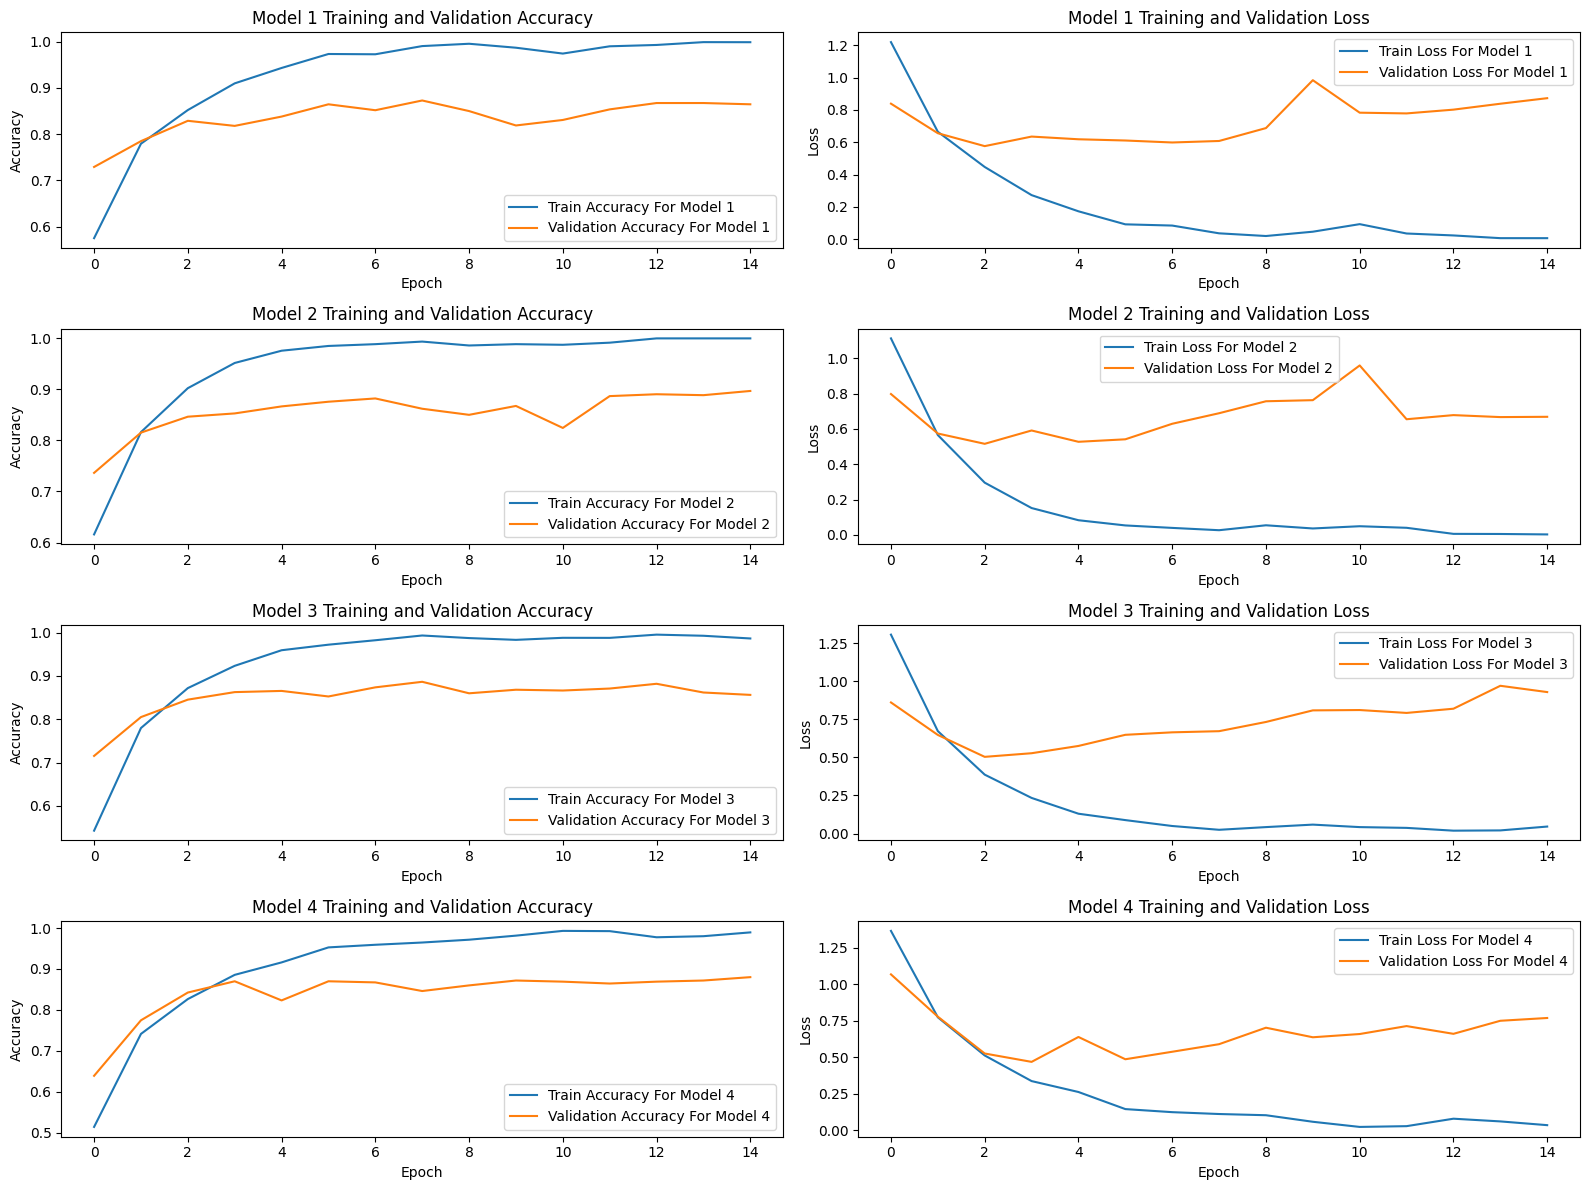

In [32]:
# KOD BLOĞUNUN AÇIKLAMASI:
# Figürü oluşturduk.
# 4 satırlı, 2 sütunlu bir subplot oluşturduk. Sırayla 1, 2,... doldurduk.
# Her satırın ilkine o modelin isabetlilik, ikincisine ise loss değerlerini koyduk.
# Etiketler, başlıklar, fırına.


plt.figure(figsize=(16, 12))       #İlk değer , ikincisi .

for i in range(4):
    history = histories[i]
    plt.subplot(4, 2, i*2+1)
    plt.plot(history.history["accuracy"], label=f"Train Accuracy For Model {i+1}")
    plt.plot(history.history['val_accuracy'], label=f"Validation Accuracy For Model {i+1}")
    plt.title(f'Model {i+1} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(4, 2, i*2+2) # 2 rows, 2 columns, position 4
    plt.plot(history.history['loss'], label=f'Train Loss For Model {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss For Model {i+1}')
    plt.title(f'Model {i+1} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout() # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()